<a href="https://colab.research.google.com/github/SongSiWoon/DeepFake_study/blob/main/DeepLearning_Study_D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**직접 작성한 손글씨 데이터 학습하기**

In [60]:
import pandas as pd
from sklearn import svm, metrics

In [61]:
def read_data(fname):
    mr = pd.read_csv(fname,header=None)
    label=[] #y값(종속변수) 컬렉션
    data=[] #x값(독립변수) 컬렉션
    for ri, row in mr.iterrows():
        label.append(row.loc[400]) #401번째에 어떠한 숫자를 쓴 것인지를 얻어온다
        other_data=[]
        for v in row.loc[0:399]: #손글씨 쓴 내용을 얻어온다(20x20픽셀, 총 400쉘)
            other_data.append(v)
        data.append(other_data) #손글씨 데이터를 독립변수 컬렌션에 추가한다.
    return label,data #호출한 곳에 종속변수와 독립변수 컬렉션을 반환

In [62]:
#학습 데이터 경로명
bfiles=[]
for i in range(1,8):
    bfiles.append("/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting"+str(i)+".csv")
bfiles

['/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting1.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting2.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting3.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting4.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting5.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting6.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting7.csv']

In [63]:
#테스트 데이터 경로명
tfiles=[]
for i in range(1,10):
    tfiles.append("/content/drive/MyDrive/Study_DeapFake/손글씨 자료/"+str(i)+".csv")
tfiles

['/content/drive/MyDrive/Study_DeapFake/손글씨 자료/1.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/2.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/3.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/4.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/5.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/6.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/7.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/8.csv',
 '/content/drive/MyDrive/Study_DeapFake/손글씨 자료/9.csv']

In [64]:
#머신러닝 모델 생성
clf = svm.SVC()

In [65]:
for bfile in bfiles:
    label,data = read_data(bfile) #학습 데이터를 로딩
    #학습
    clf.fit(data,label)
    #학습한 것을 가지고 인식을 얼마나 잘하는지 테스트
    print("======",bfile)
    for tfile in tfiles: #숫자별로 인식 정도를 테스트
        tl,td = read_data(tfile) #테스트에 사용할 데이터를 로딩
        #예측하여라(인식 정도를 확인)
        results = clf.predict(td) #독립변수 컬렉션을 전달하면 예측값 컬렉션 반환
        #예측을 얼만큼 잘 했는지 점수를 부여
        score = metrics.accuracy_score(results,tl)
        print("{0}:{1}".format(tl[0],score))

====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting1.csv
1:1.0
2:0.95
3:0.7
4:0.95
5:0.8
6:0.8
7:0.8
8:0.85
9:0.85
====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting2.csv
1:1.0
2:1.0
3:0.75
4:1.0
5:0.9
6:0.95
7:0.95
8:0.9
9:0.9
====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting3.csv
1:1.0
2:1.0
3:0.75
4:1.0
5:0.85
6:0.9
7:0.95
8:0.9
9:1.0
====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting4.csv
1:1.0
2:1.0
3:0.75
4:1.0
5:0.85
6:0.9
7:0.95
8:0.9
9:1.0
====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting5.csv
1:1.0
2:1.0
3:0.75
4:1.0
5:0.85
6:0.9
7:0.95
8:0.9
9:1.0
====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting6.csv
1:1.0
2:1.0
3:0.75
4:1.0
5:0.95
6:0.9
7:0.9
8:0.9
9:1.0
====== /content/drive/MyDrive/Study_DeapFake/손글씨 자료/Handwriting7.csv
1:1.0
2:1.0
3:0.75
4:1.0
5:0.9
6:0.9
7:0.9
8:0.9
9:1.0


##**MNIST파일 구조 분석**

In [66]:
import numpy as np
import keras
from tensorflow import keras
from keras.utils import np_utils
from sklearn.linear_model import LinearRegression

In [67]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [68]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [69]:
for r in range(28):
    for c in range(28):
        if(x_train[59999][r][c]!=0):
            print("ㅁ",end=" ")
        else:
            print("  ",end=' ')
    print()

                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                ㅁ ㅁ ㅁ ㅁ                         
                                       ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ                      
                                    ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ    ㅁ ㅁ ㅁ       
                                 ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ       ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ       
                              ㅁ ㅁ ㅁ ㅁ ㅁ             ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ          
                              ㅁ ㅁ ㅁ                   ㅁ ㅁ ㅁ ㅁ ㅁ             
                              ㅁ ㅁ ㅁ  

In [70]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [71]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [72]:
for r in range(28):
    for c in range(28):
        if(x_test[0][r][c]!=0):
            print("ㅁ",end=" ")
        else:
            print("  ",end=' ')
    print()

                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                                                                                    
                  ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ                                                 
                  ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ                   
                  ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ                   
                                 ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ ㅁ                   
                                                      ㅁ ㅁ ㅁ ㅁ                   
                                 

##**MNIST 데이터로 손글씨 인식 - 머신러닝**

In [73]:
#내가 사용할 모델에 맞게 데이터의 구조와 값을 수정
x_train2 = x_train.reshape(-1,28*28) #2차원 형태의 독립변수 구조를 1차원 형태로 변형
x_train2.shape

(60000, 784)

In [74]:
x_test2=x_test.reshape(-1,28*28)

In [75]:
y_train2 = np_utils.to_categorical(y_train)


In [76]:
y_test2 = np_utils.to_categorical(y_test)

In [77]:
mv = min(x_train2[0])
Mv = max(x_train2[0])
mv, Mv

(0, 255)

In [78]:
x_train3=x_train2/255.0
x_test3=x_test2/255.0
mv2 = min(x_train3[0])
Mv2 = max(x_train3[0])
mv2,Mv2

(0.0, 1.0)

In [79]:
#선형 회귀 모델 생성
lr = LinearRegression()

In [80]:
#학습
lr.fit(x_train3,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
#예측
result = lr.predict(x_test3)

In [82]:
result[0], y_test[0], y_test2[0]

(array([ 0.02770996,  0.00618298,  0.10690041,  0.10259679, -0.11571961,
        -0.01106006, -0.01830345,  0.90581385, -0.08378306,  0.08020427]),
 7,
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [83]:
res=[]
for r in range(len(result)):
    res.append(np.argmax(result[r])) #제일 큰 값이 있는 인덱스를 얻어와서(argmax) res에 추가
res2 = np.array(res)
res2, y_test

(array([7, 2, 1, ..., 4, 5, 6]), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [84]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(columns=['x','y'])
df.loc[0] = [1,4]
df.loc[1] = [1,3]
df.loc[2] = [2,5]
df.loc[3] = [2,2]
df.loc[4] = [1,12]
df.loc[5] = [2,13]
df.loc[6] = [3,13]
df.loc[7] = [4,6]
df.loc[8] = [4,8]
df.loc[9] = [5,7]

df

,x,y
0,1,4
1,1,3
2,2,5
3,2,2
4,1,12
5,2,13
6,3,13
7,4,6
8,4,8
9,5,7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


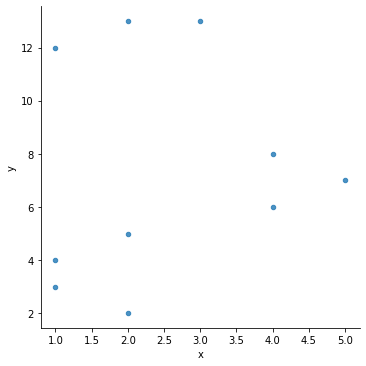

In [87]:
#테스트 데이터 도면에 그리기
sns.lmplot('x','y',data=df,fit_reg=False,scatter_kws={"s":20})
plt.show()

In [88]:
#군집화 데이터로 정제화
data_points = df.values
data_points

array([[1, 4],
       [1, 3],
       [2, 5],
       [2, 2],
       [1, 12],
       [2, 13],
       [3, 13],
       [4, 6],
       [4, 8],
       [5, 7]], dtype=object)

In [89]:
#KMeans 모델로 군집화
md = KMeans(n_clusters=3) #n_clusters는 군집 개수
kmeans = md.fit(data_points)

In [91]:
df['label'] = kmeans.labels_
df

,x,y,label
0,1,4,0
1,1,3,0
2,2,5,0
3,2,2,0
4,1,12,2
5,2,13,2
6,3,13,2
7,4,6,1
8,4,8,1
9,5,7,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


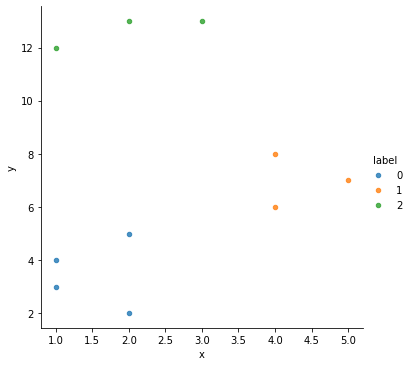

In [92]:
#군집 도식화
sns.lmplot('x','y',data=df,fit_reg=False,scatter_kws={"s":20},hue='label')

##**딥러닝 - 선형회귀를 이용한 손글씨 인식**

In [94]:
#모델 생성
from keras import layers,models
model = models.Sequential()

In [96]:
model.add(layers.Dense(100,activation='relu',input_shape=(784,))) #입력 계층: 784->100
model.add(layers.Dense(28,activation='relu')) #은닉 계층: 100->20
model.add(layers.Dense(10,activation='softmax')) #출력 계층: 28->10

In [97]:
#모델을 동작 가능한 상태로 만들기 - 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [99]:
#학습
model.fit(x_train3,y_train2,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - accuracy: 0.9557
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1169 - accuracy: 0.9683
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0946 - accuracy: 0.9739
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9781
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9818
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0603 - accuracy: 0.9823
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0475 - accuracy: 0.9865
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0430 - accuracy: 0.9880
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.038

In [100]:
#학습한 것을 가지고 실제 테스트를 하여 평가해보자
score = model.evaluate(x_test3,y_test2)
score

313/313 [==============================] - 1s 1ms/step - loss: 0.1152 - accuracy: 0.9750


[0.11522673070430756, 0.9750000238418579]

(10000, 784)

##**붓꽃의 종류를 확인해 봅시다.**

In [103]:
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [129]:
#선형 회귀
lr = LinearRegression()

#분류 모델
clf = svm.SVC()

In [105]:
#데이터 로딩
csv = pd.read_csv('/content/drive/MyDrive/Study_DeapFake/Data/iris.csv')
csv

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [107]:
#독립변수 추출
data = csv[['sepal.length','sepal.width','petal.length','petal.width']]
data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [108]:
#종속 변수 추출
label = csv['variety']
label

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [109]:
#분류 학습
clf.fit(data,label)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
#결과 예측
example = [[5.5, 3.1, 5.2, 1.9],[5.2, 3.6, 1.3, 0.23]]
result = clf.predict(example)
result

array(['Virginica', 'Setosa'], dtype=object)

In [117]:
#선형회귀 학습
#lr.fit(data,label) - 선형 회귀 모델로 학습하기 위해서는 종속 변수값이 상수로 표현
#데이터 로딩
csv2 = pd.read_csv('/content/drive/MyDrive/Study_DeapFake/Data/iris2.csv')
csv2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [118]:
#독립변수 추출
data2 = csv[['sepal.length','sepal.width','petal.length','petal.width']]
data2

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [120]:
#종속 변수 추출
label2 = csv2['variety']
label2

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

In [130]:
#학습
lr.fit(data2,label2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
#결과 예측
example2 = [[5.5, 3.1, 5.2, 1.9],[5.2, 3.6, 1.3, 0.23]]
result2 = lr.predict(example2)
result2

array([ 1.79329969, -0.10233484])

##**독버섯인지 판별**

In [162]:
import pandas as pd
import random
from sklearn import svm, metrics
from sklearn.linear_model import LinearRegression

In [163]:
def read_data(fname):
    mr =  pd.read_csv(fname,header=None) #CSV파일을 읽기
    train_label = []#학습 종속변수
    test_label=[] #테스트 종속변수

    train_data = []#학습 독립변수
    test_data=[] #테스트 독립변수

    label = [] #종속 변수를 보관
    data = [] #독립 변수 보관
    for ri, row in mr.iterrows(): #로딩한 데이터를 한줄씩 해석
        r= random.randint(1,5) #1이나오면 테스트 데이터, 그외 학습데이터
        if r==1:
            test_label.append(ord(row.loc[0]))
        else:
            train_label.append(ord(row.loc[0]))

        ot=[]
        for v in row.loc[1:]: #인덱스 1에서 맨 마지막 요소까지
            ot.append(ord(v)) #데이터 v를 정수 형식으로 변환하여 ot컬렉션에 추가
        if r==1:
            test_data.append(ot)
        else:
            train_data.append(ot)
    return train_data, train_label, test_data, test_label

In [164]:
tr_d, tr_l, te_d, te_l = read_data("/content/drive/MyDrive/Study_DeapFake/Data/mushrooms.csv")

In [165]:
tr_darr = np.array(tr_d[0])
tr_darr

array([ 98, 115, 119, 116, 108, 102,  99,  98, 110, 101,  99, 115, 115,
       119, 119, 112, 119, 111, 112, 110, 110, 109])

In [166]:
len(tr_d), len(tr_l), len(te_d), len(te_l)

(6529, 6529, 1595, 1595)

In [167]:
#모델 생성
clf = svm.SVC()

In [168]:
#학습
clf.fit(tr_d,tr_l)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [169]:
#예측
result = clf.predict(te_d)

In [170]:
#비교
rarr = np.array(result)
tearr = np.array(te_l)
rarr, tearr

(array([112, 101, 112, ..., 101, 112, 112]),
 array([112, 101, 112, ..., 101, 112, 112]))

In [171]:
#정확도 계산
score = metrics.accuracy_score(result,te_l)
score

0.9974921630094044